# 📌 Extracción

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/datos_tratados.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [41]:
# Ver las columnas disponibles
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [42]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   float64
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   float64
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

# 🛠️ Preparación de los Datos

In [43]:
#Transformación de los datos 1.0 y 0.0 de customer.SeniorCitizen a True y False (valores booleanos)
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].replace({0.0: False, 1.0: True})
df.head()

/tmp/ipython-input-1839888010.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,False,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [44]:
#Eliminación de columnas irrelevantes
df = df.drop(columns=['customerID'])

In [45]:
columnas_categoricas = df.select_dtypes(include=['object']).columns
print(columnas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [46]:
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,False,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,False,No,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,False,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,True,Yes,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,True,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,False,No,No,13.0,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,Yes,Male,False,Yes,No,22.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,No,Male,False,No,No,2.0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,No,Male,False,Yes,Yes,67.0,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [47]:
#Creación de nuevo dataframe (copia del df original) para limpieza de datos
#Se unificarán los valores 'No Internet Service' y 'No' a 'No'
df_limpio = df.copy()
columnas_a_limpiar = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
for columnas in columnas_a_limpiar:
    df_limpio[columnas] = df_limpio[columnas].replace('No internet service', 'No')

otra_columna_a_limpiar = ['phone.MultipleLines']
for columna in otra_columna_a_limpiar:
    df_limpio[columna] = df_limpio[columna].replace('No phone service', 'No')

col_categoricas = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod']



# ***Encoding***

In [48]:
df_encoded= pd.get_dummies(df_limpio, columns= col_categoricas, drop_first=True)
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,False,9.0,65.6,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,False,9.0,59.9,542.40,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,False,4.0,73.9,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,True,13.0,98.0,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,True,3.0,83.9,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   bool   
 1   customer.tenure                                7043 non-null   float64
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Churn_Yes                                      7043 non-null   bool   
 5   customer.gender_Male                           7043 non-null   bool   
 6   customer.Partner_Yes                           7043 non-null   bool   
 7   customer.Dependents_Yes                        7043 non-null   bool   
 8   phone.PhoneService_Yes                         7043 non-null   bool   
 9   phone.MultipleLines_Yes                        7043 

In [50]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0
phone.MultipleLines_Yes,0


In [51]:
#Eliminación de filas donde existen valores nulos
df_encoded = df_encoded.dropna(subset=['account.Charges.Total'])
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0
phone.MultipleLines_Yes,0


# **Verificación de la proproción de cancelación (Churn)**

In [52]:
df_encoded['Churn_Yes'].value_counts()

,count
Churn_Yes,
False,5163
True,1869


# Estandarización de las variables numéricas

In [53]:
from sklearn.preprocessing import StandardScaler

df_dif = df_encoded.copy()
#Identificación de las variables numéricas
columnas_numericas = ['customer.tenure','account.Charges.Monthly','account.Charges.Total']

#Estandarización de las variables numéricas
scaler = StandardScaler()

#Aplicar scaler a las variables numéricas
df_dif[columnas_numericas] = scaler.fit_transform(df_dif[columnas_numericas])

display(df_dif.head())

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,False,-0.954296,0.026652,-0.745607,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,False,-0.954296,-0.162819,-0.768063,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,False,-1.158016,0.302548,-0.883456,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,True,-0.791321,1.103642,-0.461240,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,True,-1.198760,0.634952,-0.889390,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


# **Correlación y Selección de Variables**

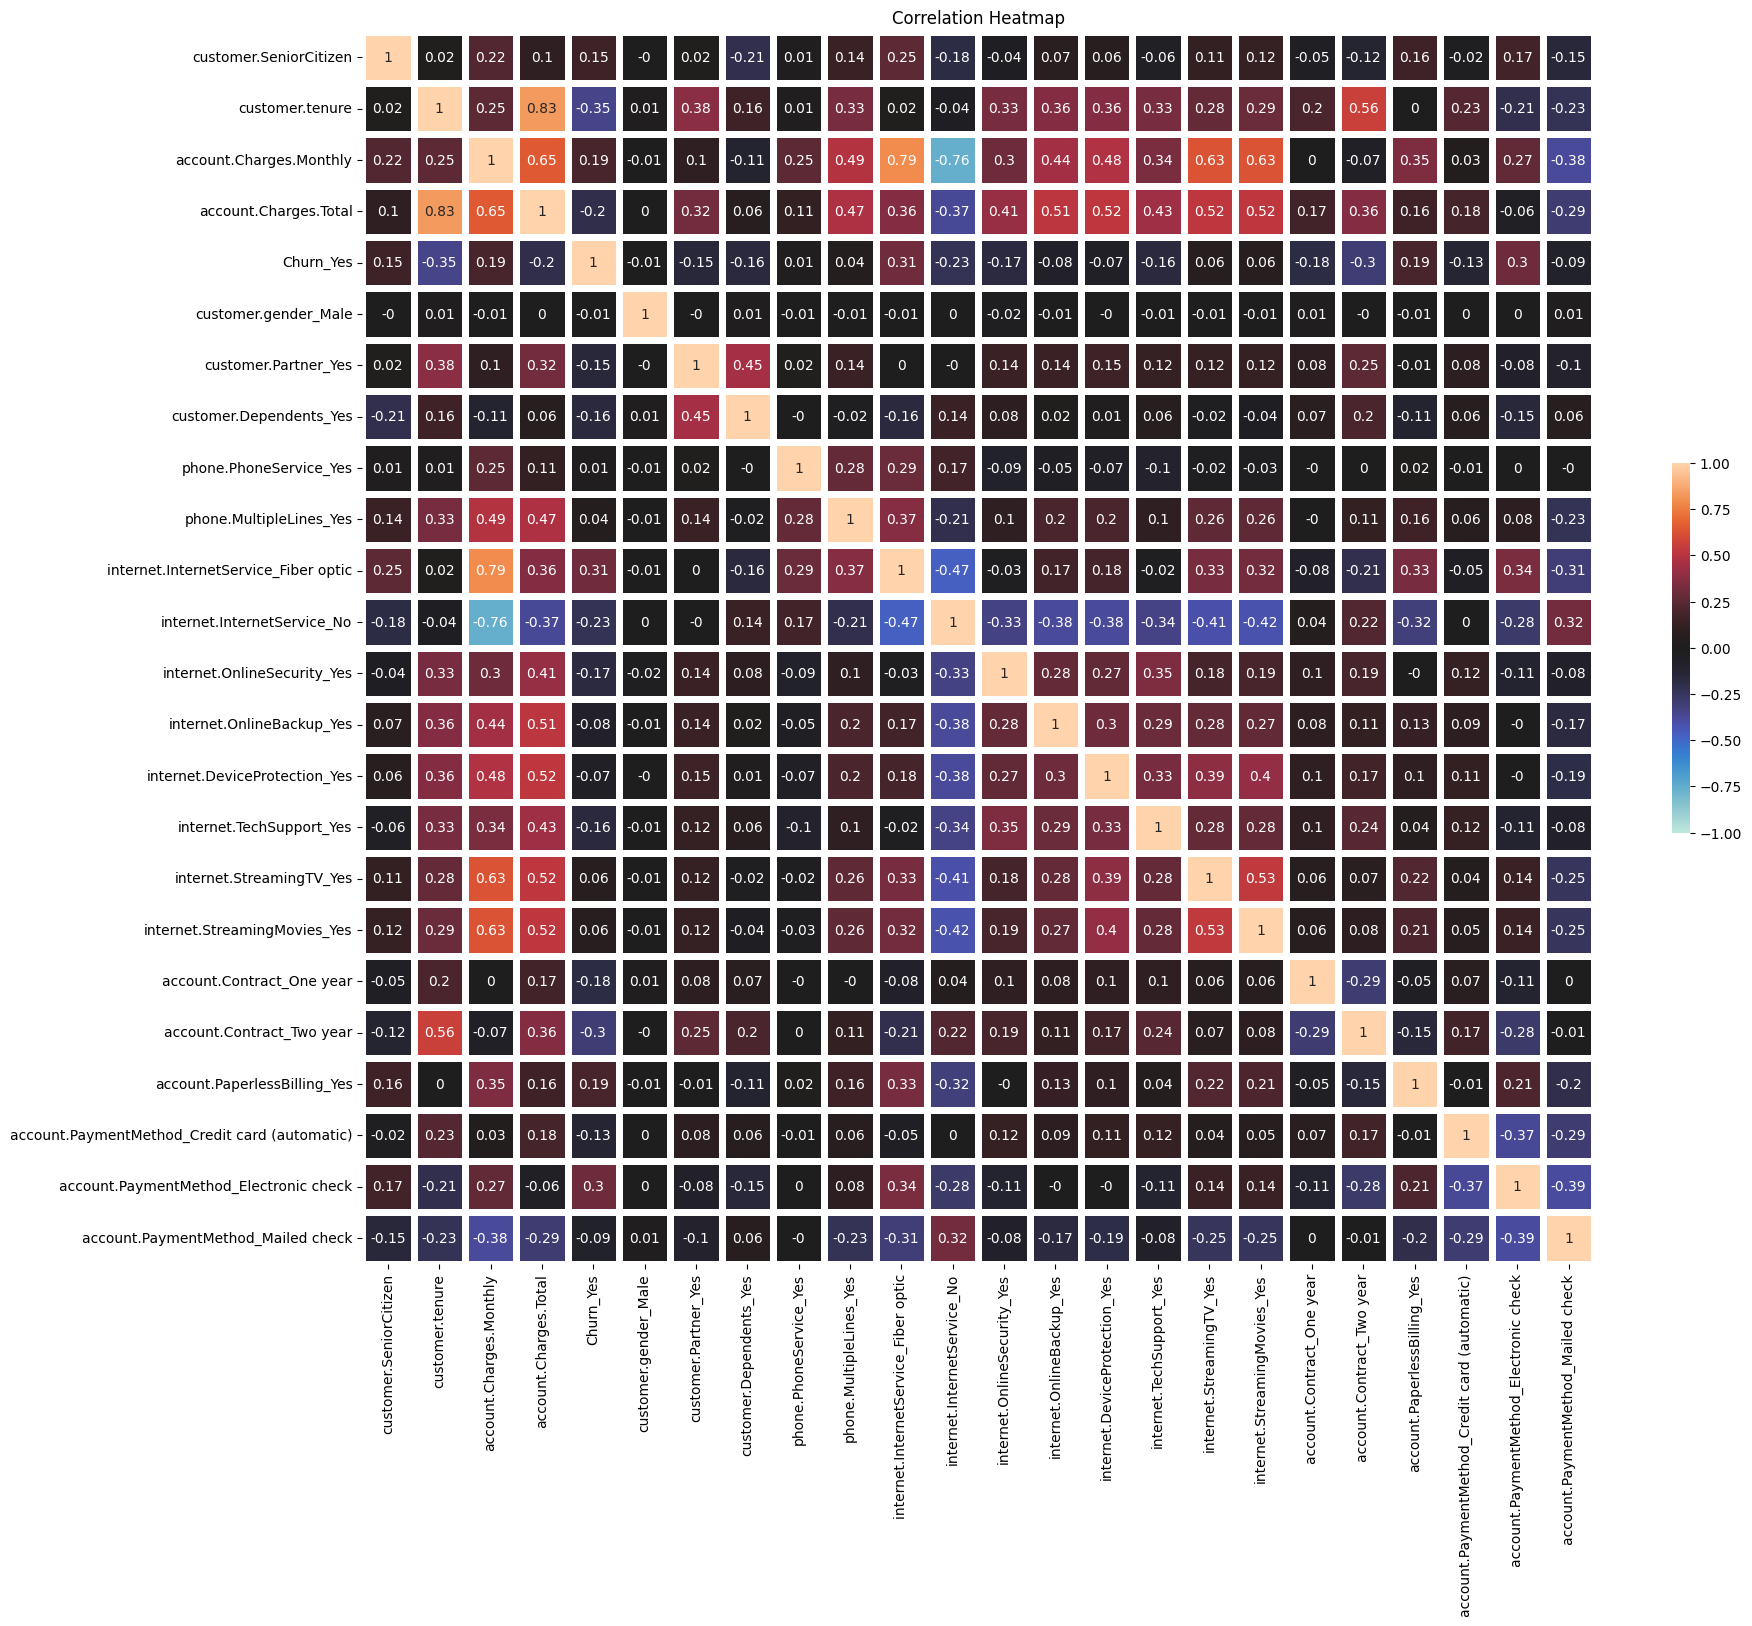

In [54]:
corr = df_dif.corr()

import numpy as np
fig, ax = plt.subplots(figsize=(20, 16))
ax=sns.heatmap(np.round(corr,2), vmax=1,vmin=-1,center=0, square=True, linewidth=5, annot=True, cbar_kws={"shrink":0.3})
plt.title('Correlation Heatmap')
plt.show()

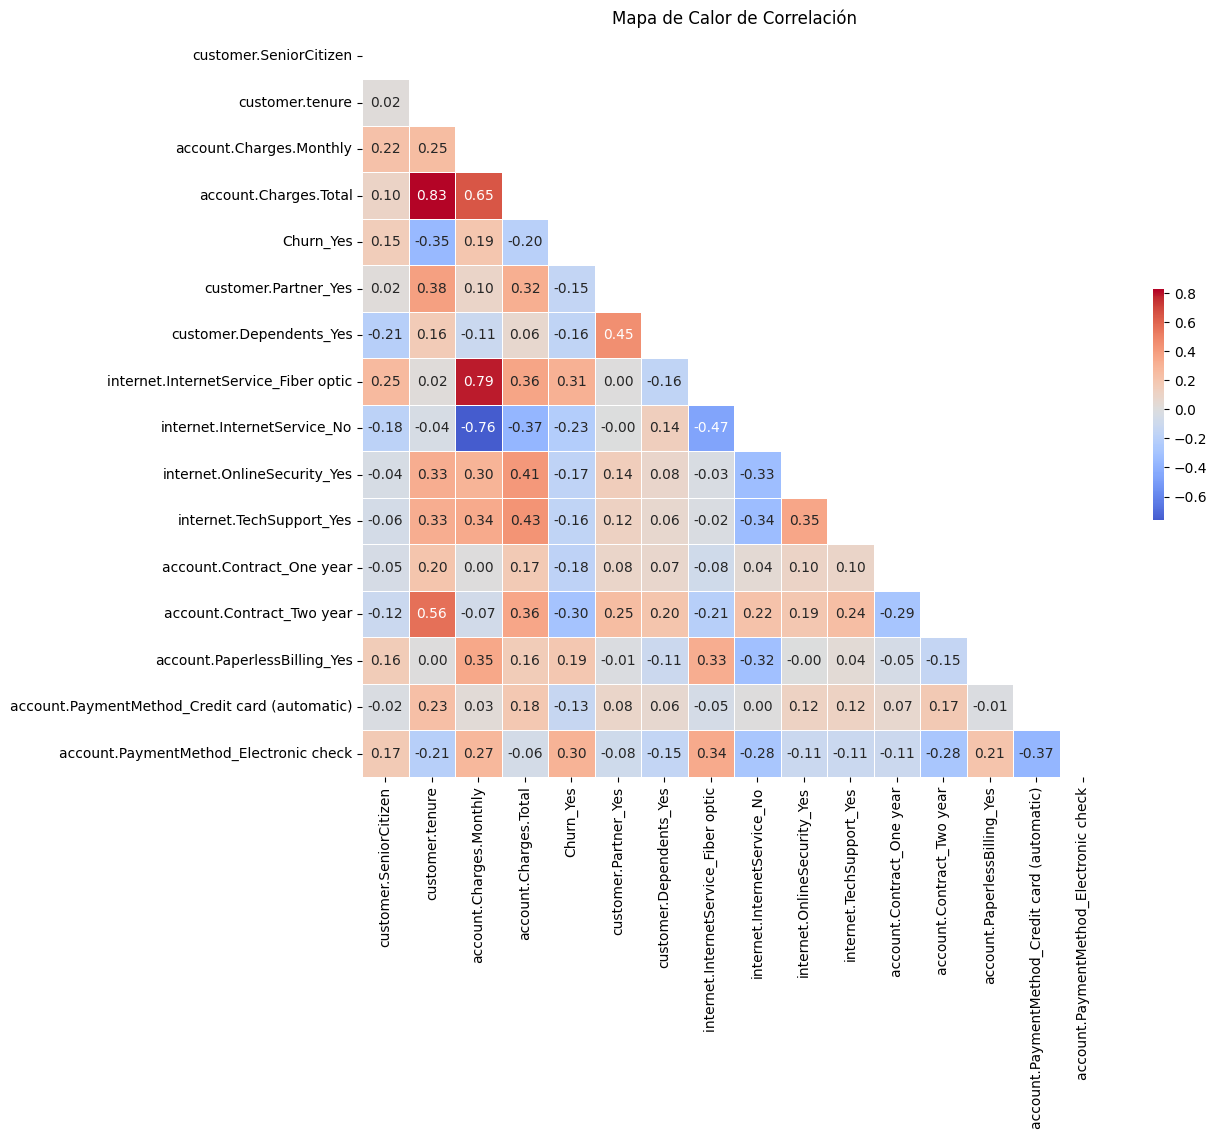

In [55]:
#Enmascarar mapa de calor
#Definimos la variable dependiente
var_dependiente = "Churn_Yes"

#Definición del valor mínimo para correlación
corr_minimo=0.1

#Filtrar variables que tengan correlación absoluta >= a coor_minimo
variables_relevantes = corr.index[abs(corr[var_dependiente])>=corr_minimo].tolist()

#Incluir la variable dependiente en la lista en caso de que no esté incluida
if var_dependiente not in variables_relevantes:
  variables_relevantes.append(var_dependiente)

#Creación de matriz de correlación solo con las variables relevantes
corr_relevantes = corr.loc[variables_relevantes, variables_relevantes]

#Creación de una máscara para esconder el triángulo superior de la matriz
mascara=np.triu(np.ones_like(corr_relevantes, dtype=bool))

#Creación del mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_relevantes,annot=True,fmt='.2f',cmap='coolwarm', center=0,square=True,linewidth=0.5,cbar_kws={"shrink":0.3},mask=mascara)
plt.title('Mapa de Calor de Correlación')
plt.show()

# Análisis de multicolinealidad

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_dif.drop(columns=['Churn_Yes'])
X_const = add_constant(X)
X_const = X_const.astype(float)

#Calculo de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=True))

,Variable,VIF
5,customer.gender_Male,1.002106
1,customer.SeniorCitizen,1.153220
20,account.PaperlessBilling_Yes,1.208455
7,customer.Dependents_Yes,1.381598
6,customer.Partner_Yes,1.462988
21,account.PaymentMethod_Credit card (automatic),1.560999
18,account.Contract_One year,1.625784
23,account.PaymentMethod_Mailed check,1.857058
22,account.PaymentMethod_Electronic check,1.976032
19,account.Contract_Two year,2.652328


# Análisis dirigido

In [57]:
#Relación de la variable Churn respecto a otras variables independientes
#Churn vs tenure con plotly
import plotly.express as px
px.box(df_encoded, x='Churn_Yes', y='customer.tenure', color='Churn_Yes', title='Churn vs tenure')

In [58]:
#Churn vs TotalCharges con plotly
px.box(df_encoded, x='Churn_Yes', y='account.Charges.Total', color='Churn_Yes', title='Churn vs TotalCharges')

In [59]:
#Churn vs ChargesMonthly con plotly
px.box(df_encoded, x='Churn_Yes', y='account.Charges.Monthly', color='Churn_Yes', title='Churn vs Monthly Charges')

In [60]:
#Histograma Churn vs customer.SeniorCitizen con plotly
px.histogram(df_encoded, x='customer.SeniorCitizen', color='Churn_Yes', title='Churn vs customer.SeniorCitizen', barmode='group')

In [61]:
#Histograma Churn vs Gender con plotly
px.histogram(df_encoded, x='customer.gender_Male', color='Churn_Yes', title='Churn vs Gender', barmode='group')

In [62]:
#Histograma Churn vs Tipo de Contrato con plotly
px.histogram(df, x='account.Contract', color='Churn', title='Churn vs Tipo de Contrato', barmode='group')

In [63]:
#Histograma Churn vs internet.InternetService con plotly
px.histogram(df, x='internet.InternetService', color='Churn', title='Churn vs Internet Service', barmode='group')

In [64]:
#Histograma Churn vs Online Security con plotly
px.histogram(df, x='internet.OnlineSecurity', color='Churn', title='Churn vs Online security', barmode='group')

In [65]:
#Histograma Churn vs Online Backup con plotly
px.histogram(df, x='internet.OnlineBackup', color='Churn', title='Churn vs Online backup', barmode='group')

In [66]:
#Histograma Churn vs Device Protection con plotly
px.histogram(df, x='internet.DeviceProtection', color='Churn', title='Churn vs Device Protection', barmode='group')

In [67]:
#Histograma Churn vs Tech Support con plotly
px.histogram(df, x='internet.TechSupport', color='Churn', title='Churn vs Tech Support', barmode='group')

In [68]:
#Histograma Churn vs Streaming TV con plotly
px.histogram(df, x='internet.StreamingTV', color='Churn', title='Churn vs Streaming TV', barmode='group')

In [69]:
#Histograma Churn vs Streaming Movies con plotly
px.histogram(df, x='internet.StreamingMovies', color='Churn', title='Churn vs Streaming Movies', barmode='group')

# Recalculo del VIF

In [70]:
#Luego de analizar las variables individuales mediante gráficas se eliminarán columnas con datos que poco aportan a decidir si el cliente desertarpa o no como cliente, o aquellas con datos redundante
# Eliminación de customer.gender_Male
df_dif = df_dif.drop(columns=['customer.gender_Male'])
#Elminación de las columnas customer.tenure y account.Charges.Monthly
df_dif = df_dif.drop(columns=['customer.tenure', 'account.Charges.Monthly'])
#df_dif = df_dif.drop(columns=['account.Charges.Monthly','account.Charges.Total'])
#Eliminación de la columna internet.InternetService_No
df_dif = df_dif.drop(columns=['internet.InternetService_No'])

#VIF
X = df_dif.drop(columns=['Churn_Yes'])
X_const = add_constant(X)
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=True))

,Variable,VIF
1,customer.SeniorCitizen,1.151047
16,account.PaperlessBilling_Yes,1.194330
5,phone.PhoneService_Yes,1.249993
8,internet.OnlineSecurity_Yes,1.331096
4,customer.Dependents_Yes,1.380389
11,internet.TechSupport_Yes,1.400469
9,internet.OnlineBackup_Yes,1.412737
3,customer.Partner_Yes,1.443240
14,account.Contract_One year,1.446609
6,phone.MultipleLines_Yes,1.454187


# Recalculo de la correlación de variables

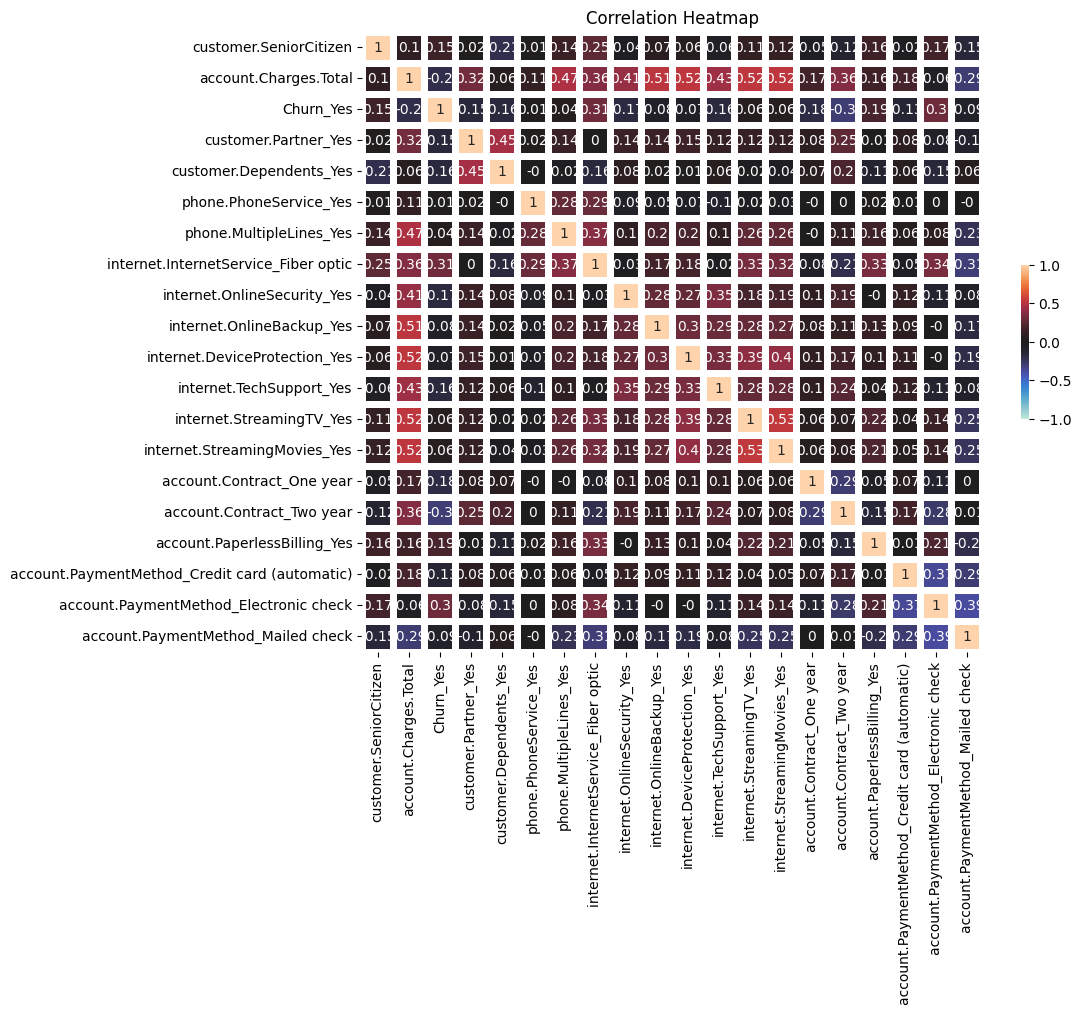

In [71]:
corr = df_dif.corr()

import numpy as np
fig, ax = plt.subplots(figsize=(10, 20))
ax=sns.heatmap(np.round(corr,2), vmax=1,vmin=-1,center=0, square=True, linewidth=5, annot=True, cbar_kws={"shrink":0.1})
plt.title('Correlation Heatmap')
plt.show()

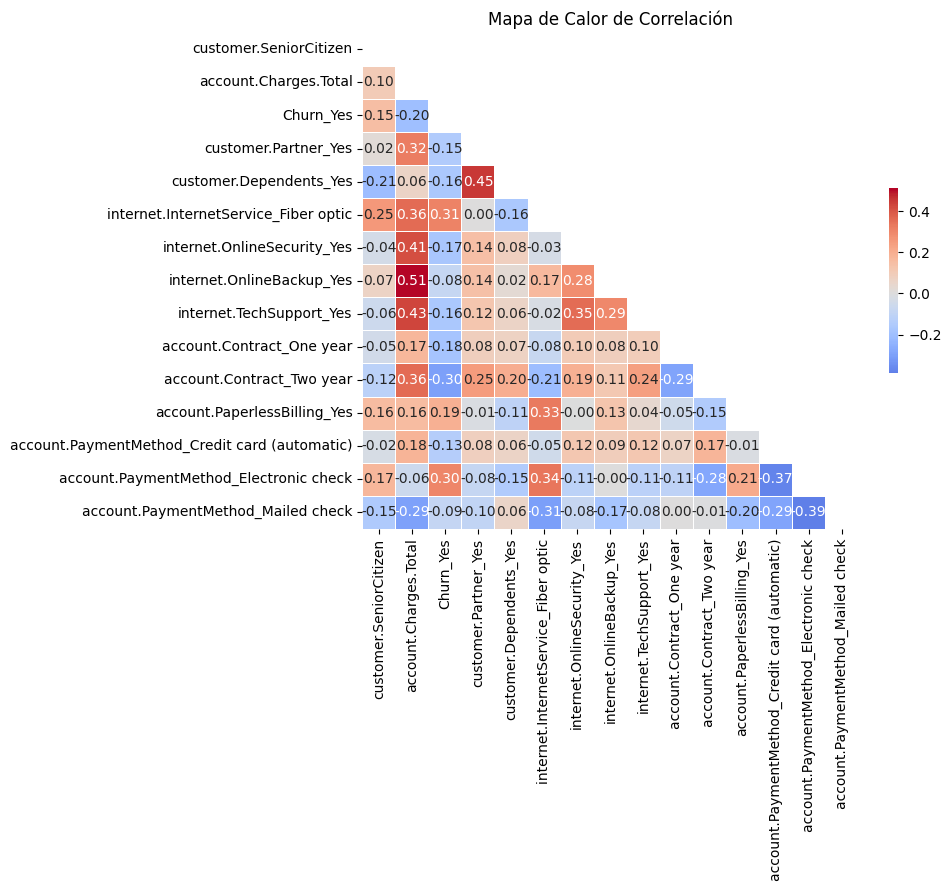

In [72]:
#Enmascarar mapa de calor
#Definimos la variable dependiente
var_dependiente = "Churn_Yes"

#Definición del valor mínimo para correlación
corr_minimo=0.07

#Filtrar variables que tengan correlación absoluta >= a coor_minimo
variables_relevantes = corr.index[abs(corr[var_dependiente])>=corr_minimo].tolist()

#Incluir la variable dependiente en la lista en caso de que no esté incluida
if var_dependiente not in variables_relevantes:
  variables_relevantes.append(var_dependiente)

#Creación de matriz de correlación solo con las variables relevantes
corr_relevantes = corr.loc[variables_relevantes, variables_relevantes]

#Creación de una máscara para esconder el triángulo superior de la matriz
mascara=np.triu(np.ones_like(corr_relevantes, dtype=bool))

#Creación del mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(corr_relevantes,annot=True,fmt='.2f',cmap='coolwarm', center=0,square=True,linewidth=0.5,cbar_kws={"shrink":0.3},mask=mascara)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [73]:
#Eliminación de columnas con poca correlación con el resultado final
df_dif=df_dif.drop(columns=['phone.PhoneService_Yes','phone.MultipleLines_Yes','internet.StreamingTV_Yes','internet.StreamingMovies_Yes','internet.DeviceProtection_Yes'])
df_dif.columns

Index(['customer.SeniorCitizen', 'account.Charges.Total', 'Churn_Yes',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'internet.InternetService_Fiber optic', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_Yes', 'internet.TechSupport_Yes',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

# Modelos Predictivos

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import numpy as np
import pandas as pd

X= df_dif.drop('Churn_Yes', axis=1)
y= df_dif['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Balanceo de datos
#

print("Tamaño del conjunto de entrenamiento original:", X_train.shape)
print("Distribución de la variable objetivo en el conjunto de entrenamiento con los datos originales:")
print(y_train.value_counts())

#Balanceo de datos
#Oversampling
smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

print('\n---------------------------------------------------------------------------------------------')
print("Tamaño del conjunto de entrenamiento luego del oversampling:", X_train_os.shape)
print("Distribución de la variable objetivo en el conjunto de entrenamiento luego de oversampling:")
print(y_train_os.value_counts())

#Undersampling
nm = NearMiss(version=3)
X_train_us, y_train_us = nm.fit_resample(X_train, y_train)

print('\n---------------------------------------------------------------------------------------------')
print("Tamaño del conjunto de entrenamiento luego del undersampling:", X_train_us.shape)
print("Distribución de la variable objetivo en el conjunto de entrenamiento luego de undersampling:")
print(y_train_us.value_counts())

Tamaño del conjunto de entrenamiento original: (4922, 14)
Distribución de la variable objetivo en el conjunto de entrenamiento con los datos originales:
Churn_Yes
False    3614
True     1308
Name: count, dtype: int64

---------------------------------------------------------------------------------------------
Tamaño del conjunto de entrenamiento luego del oversampling: (7228, 14)
Distribución de la variable objetivo en el conjunto de entrenamiento luego de oversampling:
Churn_Yes
True     3614
False    3614
Name: count, dtype: int64

---------------------------------------------------------------------------------------------
Tamaño del conjunto de entrenamiento luego del undersampling: (2616, 14)
Distribución de la variable objetivo en el conjunto de entrenamiento luego de undersampling:
Churn_Yes
False    1308
True     1308
Name: count, dtype: int64


In [94]:
#Regresión logística
#RL con datos originales
lr_o = LogisticRegression(random_state=42)
lr_o.fit(X_train, y_train)
y_pred_o = lr_o.predict(X_test)
y_prob_o = lr_o.predict_proba(X_test)[:, 1]

#RL con datos oversampling
lr_os = LogisticRegression(random_state=42)
lr_os.fit(X_train_os, y_train_os)
y_pred_os = lr_os.predict(X_test)
y_prob_os = lr_os.predict_proba(X_test)[:, 1]

#RL con datos undersampling
lr_us = LogisticRegression(random_state=42)
lr_us.fit(X_train_us, y_train_us)
y_pred_us = lr_us.predict(X_test)
y_prob_us = lr_us.predict_proba(X_test)[:, 1]

#Evaluación RL
print("Evaluación de la regresión logística")
print("Modelo RL con datos originales")
print("Precisión: ", accuracy_score(y_test, y_pred_o))
print("ROC AU", roc_auc_score(y_test, y_prob_o))
classification_rep_o = classification_report(y_test, y_pred_o)
confusion_mat_o = confusion_matrix(y_test, y_pred_o)
print("Reporte de clasificación: \n", classification_rep_o)
print("Matriz de confusión: \n", confusion_mat_o)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_o[1,0]/(confusion_mat_o[1,0]+confusion_mat_o[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo RL con datos oversampling")
print("Precisión: ", accuracy_score(y_test, y_pred_os))
print("ROC AU", roc_auc_score(y_test, y_prob_os))
classification_rep_os = classification_report(y_test, y_pred_os)
confusion_mat_os = confusion_matrix(y_test, y_pred_os)
print("Reporte de clasificación: \n", classification_rep_os)
print("Matriz de confusión: \n", confusion_mat_os)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[1,0])),'% de clientes desertores')
print('3.- ',round(100*confusion_mat_os[1,0]/(confusion_mat_os[1,0]+confusion_mat_os[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo RL con datos undersampling")
print("Precisión: ", accuracy_score(y_test, y_pred_us))
print("ROC AU", roc_auc_score(y_test, y_prob_us))
classification_rep_us = classification_report(y_test, y_pred_us)
confusion_mat_us = confusion_matrix(y_test, y_pred_us)
print("Reporte de clasificación: \n", classification_rep_us)
print("Matriz de confusión: \n", confusion_mat_us)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[1,0])),'% de clientes desertores')
print('3.- ',round(100*confusion_mat_us[1,0]/(confusion_mat_us[1,0]+confusion_mat_us[0,0])),'% de los clientes identificados como fieles son desertores')

Evaluación de la regresión logística
Modelo RL con datos originales
Precisión:  0.785781990521327
ROC AU 0.8245576181056377
Reporte de clasificación: 
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1549
        True       0.63      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110

Matriz de confusión: 
 [[1386  163]
 [ 289  272]]


Capacidad del modelo de acertar clientes candidatos a desertar:
1.- El modelo acierta el 63 % de los clientes que identifica como desertores
2.- El modelo logra identificar el 48 % de clientes desertores
3.- 17 % de los clientes identificados como fieles son desertores

---------------------------------------------------------------------
Modelo RL con datos oversampling
Precisión:  0.7369668246445498
ROC AU 0.8202226955692189
Reporte de clasificación: 
           

In [100]:
#Random Forest
#RF con datos originales
rf_o = RandomForestClassifier(max_depth=5,random_state=42)
rf_o.fit(X_train, y_train)
y_pred_o = rf_o.predict(X_test)
y_prob_o = rf_o.predict_proba(X_test)[:,1]

#RF con datos oversampling
rf_os = RandomForestClassifier(max_depth=5,random_state=42)
rf_os.fit(X_train_os, y_train_os)
y_pred_os = rf_o.predict(X_test)
y_prob_os = rf_o.predict_proba(X_test)[:,1]

#RF con datos undersampling
rf_us = RandomForestClassifier(max_depth=5,random_state=42)
rf_us.fit(X_train_us, y_train_us)
y_pred_us = rf_o.predict(X_test)
y_prob_us = rf_o.predict_proba(X_test)[:,1]

#Evaluación RF
print("Evaluación del modelo random forest")
print("Modelo RF con datos originales")
print("Precisión: ", accuracy_score(y_test, y_pred_o))
print("ROC AU", roc_auc_score(y_test, y_prob_o))
classification_rep_o = classification_report(y_test, y_pred_o)
confusion_mat_o = confusion_matrix(y_test, y_pred_o)
print("Reporte de clasificación: \n", classification_rep_o)
print("Matriz de confusión: \n", confusion_mat_o)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_o[1,0]/(confusion_mat_o[1,0]+confusion_mat_o[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo RF con datos oversampling")
print("Precisión: ", accuracy_score(y_test, y_pred_os))
print("ROC AU", roc_auc_score(y_test, y_prob_os))
classification_rep_os = classification_report(y_test, y_pred_os)
confusion_mat_os = confusion_matrix(y_test, y_pred_os)
print("Reporte de clasificación: \n", classification_rep_os)
print("Matriz de confusión: \n", confusion_mat_os)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_os[1,0]/(confusion_mat_os[1,0]+confusion_mat_os[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo RF con datos undersampling")
print("Precisión: ", accuracy_score(y_test, y_pred_us))
print("ROC AU", roc_auc_score(y_test, y_prob_us))
classification_rep_us = classification_report(y_test, y_pred_us)
confusion_mat_us = confusion_matrix(y_test, y_pred_us)
print("Reporte de clasificación: \n", classification_rep_us)
print("Matriz de confusión: \n", confusion_mat_us)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_us[1,0]/(confusion_mat_us[1,0]+confusion_mat_us[0,0])),'% de los clientes identificados como fieles son desertores')

Evaluación del modelo random forest
Modelo RF con datos originales
Precisión:  0.7824644549763033
ROC AU 0.8313258280599639
Reporte de clasificación: 
               precision    recall  f1-score   support

       False       0.80      0.94      0.86      1549
        True       0.67      0.35      0.46       561

    accuracy                           0.78      2110
   macro avg       0.74      0.65      0.66      2110
weighted avg       0.77      0.78      0.76      2110

Matriz de confusión: 
 [[1453   96]
 [ 363  198]]


Capacidad del modelo de acertar clientes candidatos a desertar:
1.- El modelo acierta el 67 % de los clientes que identifica como desertores
2.- El modelo logra identificar el 35 % de clientes desertores
3.- 20 % de los clientes identificados como fieles son desertores

---------------------------------------------------------------------
Modelo RF con datos oversampling
Precisión:  0.7824644549763033
ROC AU 0.8313258280599639
Reporte de clasificación: 
           

In [101]:
#Regresión SVC
from sklearn.svm import SVC

# SVC con datos originales
svc_o = SVC(kernel='linear', C=1.0)
svc_o.fit(X_train, y_train)
y_pred_o = svc_o.predict(X_test)
#y_prob_o = svc_o.predict_proba(X_test)[:,1]

#SVC con datos oversampling
svc_os = SVC(kernel='linear', C=1.0)
svc_os.fit(X_train_os, y_train_os)
y_pred_os = svc_os.predict(X_test)
#y_prob_os = svc_os.predict_proba(X_test)[:,1]

#SVC con datos undersampling
svc_us = SVC(kernel='linear', C=1.0)
svc_us.fit(X_train_us, y_train_us)
y_pred_us = svc_us.predict(X_test)
#y_prob_us = svc_us.predict_proba(X_test)[:,1]


#Evaluación SVC
print("Evaluación del modelo SVC")
print("Modelo SVC con datos originales")
print("Precisión: ", accuracy_score(y_test, y_pred_o))
#print("ROC AU", roc_auc_score(y_test, y_prob_o))
classification_rep_o = classification_report(y_test, y_pred_o)
confusion_mat_o = confusion_matrix(y_test, y_pred_o)
print("Reporte de clasificación: \n", classification_rep_o)
print("Matriz de confusión: \n", confusion_mat_o)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_o[1,0]/(confusion_mat_o[1,0]+confusion_mat_o[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo SVC con datos oversampling")
print("Precisión: ", accuracy_score(y_test, y_pred_os))
#print("ROC AU", roc_auc_score(y_test, y_prob_os))
classification_rep_os = classification_report(y_test, y_pred_os)
confusion_mat_os = confusion_matrix(y_test, y_pred_os)
print("Reporte de clasificación: \n", classification_rep_os)
print("Matriz de confusión: \n", confusion_mat_os)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_os[1,0]/(confusion_mat_os[1,0]+confusion_mat_os[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo SVC con datos undersampling")
print("Precisión: ", accuracy_score(y_test, y_pred_us))
#print("ROC AU", roc_auc_score(y_test, y_prob_us))
classification_rep_us = classification_report(y_test, y_pred_us)
confusion_mat_us = confusion_matrix(y_test, y_pred_us)
print("Reporte de clasificación: \n", classification_rep_us)
print("Matriz de confusión: \n", confusion_mat_us)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_us[1,0]/(confusion_mat_us[1,0]+confusion_mat_us[0,0])),'% de los clientes identificados como fieles son desertores')

Evaluación del modelo SVC
Modelo SVC con datos originales
Precisión:  0.7848341232227488
Reporte de clasificación: 
               precision    recall  f1-score   support

       False       0.83      0.88      0.86      1549
        True       0.62      0.51      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

Matriz de confusión: 
 [[1370  179]
 [ 275  286]]


Capacidad del modelo de acertar clientes candidatos a desertar:
1.- El modelo acierta el 62 % de los clientes que identifica como desertores
2.- El modelo logra identificar el 51 % de clientes desertores
3.- 17 % de los clientes identificados como fieles son desertores

---------------------------------------------------------------------
Modelo SVC con datos oversampling
Precisión:  0.64739336492891
Reporte de clasificación: 
               precision    recall  f1-score   support

       False     

In [102]:
#XGBoost
from xgboost import XGBClassifier
# XGB con datos originales
xgb_o = XGBClassifier()
xgb_o.fit(X_train, y_train)
y_pred_o = xgb_o.predict(X_test)
y_prob_o = xgb_o.predict_proba(X_test)[:,1]

# XGB con datos oversamplig
xgb_os = XGBClassifier()
xgb_os.fit(X_train_os, y_train_os)
y_pred_os = xgb_os.predict(X_test)
y_prob_os = xgb_os.predict_proba(X_test)[:,1]

# XGB con datos undersamplig
xgb_us = XGBClassifier()
xgb_us.fit(X_train_us, y_train_us)
y_pred_us = xgb_us.predict(X_test)
y_prob_us = xgb_us.predict_proba(X_test)[:,1]

#Evaluación XGB
print("Evaluación del modelo XGB")
print("Modelo XGB con datos originales")
print("Precisión: ", accuracy_score(y_test, y_pred_o))
print("ROC AU", roc_auc_score(y_test, y_prob_o))
classification_rep_o = classification_report(y_test, y_pred_o)
confusion_mat_o = confusion_matrix(y_test, y_pred_o)
print("Reporte de clasificación: \n", classification_rep_o)
print("Matriz de confusión: \n", confusion_mat_o)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_o[1,1]/(confusion_mat_o[1,1]+confusion_mat_o[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_o[1,0]/(confusion_mat_o[1,0]+confusion_mat_o[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo XGB con datos oversampling")
print("Precisión: ", accuracy_score(y_test, y_pred_os))
print("ROC AU", roc_auc_score(y_test, y_prob_os))
classification_rep_os = classification_report(y_test, y_pred_os)
confusion_mat_os = confusion_matrix(y_test, y_pred_os)
print("Reporte de clasificación: \n", classification_rep_os)
print("Matriz de confusión: \n", confusion_mat_os)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_os[1,1]/(confusion_mat_os[1,1]+confusion_mat_os[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_os[1,0]/(confusion_mat_os[1,0]+confusion_mat_os[0,0])),'% de los clientes identificados como fieles son desertores')
print('\n---------------------------------------------------------------------')
print("Modelo XGB con datos undersampling")
print("Precisión: ", accuracy_score(y_test, y_pred_us))
print("ROC AU", roc_auc_score(y_test, y_prob_us))
classification_rep_us = classification_report(y_test, y_pred_us)
confusion_mat_us = confusion_matrix(y_test, y_pred_us)
print("Reporte de clasificación: \n", classification_rep_us)
print("Matriz de confusión: \n", confusion_mat_us)
print('\n\nCapacidad del modelo de acertar clientes candidatos a desertar:')
print('1.- El modelo acierta el', round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[0,1])),'% de los clientes que identifica como desertores')
print('2.- El modelo logra identificar el',round(100*confusion_mat_us[1,1]/(confusion_mat_us[1,1]+confusion_mat_us[1,0])),'% de clientes desertores')
print('3.-',round(100*confusion_mat_us[1,0]/(confusion_mat_us[1,0]+confusion_mat_us[0,0])),'% de los clientes identificados como fieles son desertores')

Evaluación del modelo XGB
Modelo XGB con datos originales
Precisión:  0.7744075829383886
ROC AU 0.797010664116577
Reporte de clasificación: 
               precision    recall  f1-score   support

       False       0.83      0.87      0.85      1549
        True       0.59      0.52      0.55       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.77      0.77      2110

Matriz de confusión: 
 [[1343  206]
 [ 270  291]]


Capacidad del modelo de acertar clientes candidatos a desertar:
1.- El modelo acierta el 59 % de los clientes que identifica como desertores
2.- El modelo logra identificar el 52 % de clientes desertores
3.- 17 % de los clientes identificados como fieles son desertores

---------------------------------------------------------------------
Modelo XGB con datos oversampling
Precisión:  0.7303317535545024
ROC AU 0.7928086546550072
Reporte de clasificación: 
               preci

In [90]:
#Importancia de las variables
#Importancia de las variables en el modelo LR
importances = pd.DataFrame({'Variable': X.columns, 'Importancia': lr_us.coef_[0]})
importances = importances.sort_values('Importancia', ascending=False)
#importances = importances.sort_values('Importancia', ascending=False)
print('Modelo Logistic Regression con US:\n',importances)
print('------------------------------------------------------------------------------------')

#Importancia de las variables en el modelo RF
importances = pd.DataFrame({'Variable': X.columns, 'Importancia': rf_o.feature_importances_})
importances = importances.sort_values('Importancia', ascending=False)
#importances = importances.sort_values('Importancia', ascending=False)
print('Modelo Random Forest:\n',importances)
print('------------------------------------------------------------------------------------')

#Importancia de las variables en el modelo SVC
importances = pd.DataFrame({'Variable': X.columns, 'Importancia': svc_us.coef_[0]})
importances = importances.sort_values('Importancia', ascending=False)
#importances = importances.sort_values('Importancia', ascending=False)
print('Modelo SVC:\n',importances)
print('------------------------------------------------------------------------------------')

#Importancia de las variables en el modelo XGB
importances = pd.DataFrame({'Variable': X.columns, 'Importancia': xgb_os.feature_importances_})
importances = importances.sort_values('Importancia', ascending=False)
#importances = importances.sort_values('Importancia', ascending=False)
print('Modelo XGBoost:\n',importances)



Modelo Logistic Regression con US:
                                          Variable  Importancia
4            internet.InternetService_Fiber optic     0.853563
12         account.PaymentMethod_Electronic check     0.453443
0                          customer.SeniorCitizen     0.286359
13             account.PaymentMethod_Mailed check     0.284106
10                   account.PaperlessBilling_Yes     0.202325
9                       account.Contract_Two year     0.092412
6                       internet.OnlineBackup_Yes    -0.076004
3                         customer.Dependents_Yes    -0.101425
11  account.PaymentMethod_Credit card (automatic)    -0.127099
7                        internet.TechSupport_Yes    -0.157139
8                       account.Contract_One year    -0.201915
5                     internet.OnlineSecurity_Yes    -0.214654
2                            customer.Partner_Yes    -0.226796
1                           account.Charges.Total    -0.487001
-------------------

# **Conclusiones**

En el estudio realizado se llevó a cabo un análisis de la bases de datos provista por la empresa Telecom X, con el fin de realizar un modelo predictivo que logre identificar aquellos clientes candidatos a dejar de ser clientes de la compañia.

Se realizó un análisis dirigido de ciertas variables independientes repecto a la variable objetivo (Churn). De este estudio, se observó que la variable o columna customer.gender (género del cliente) no es significativa en cuanto a la decisión de los clientes de permanecer o dejar de ser clientes de Telecom X, por lo cual, se elimina del conjunto de datos para evitar confundir al modelo predictivo. Con el mismo espíritu, se elimina la columna Customer ID, ya que no aporta ningún valor al análisis.

Posteriormente, se realiza la preparación de los datos (normalización de variables númericas, codificación o encoding de las variables categóricas). Se evalua la multicolinealidad de las variables mediante el calculo del factor de inflación de la varianza (VIF); este análisis identificó multicolinealidad de diversas variables, desencadenando en la eliminación de columnas que provocan alta colinealidad.

Como punto final en la afinación de los datos, se estudia la correlación de los datos con respecto a la variable objetivo. Para simplificar los datos a analizar por los modelos predictivos, se eliminaron aquellas columnas con baja correlación con la variable objetivo.

Se entretaron 4 modelos predictivos:

- Logistic Regression

- Random Forest

- SVC

- XGBoost

Cada uno de los modelos se entrenó con 3 conjuntos de datos de entrenamiento:

- Conjunto de entrenamiento original

- Conjunto de entrenamiento balanceado con oversampling

- Conjunto de entrenamiento balanceado con undersampling

Los modelos más efectivos para identificar los clientes con perfil desertor fueron Logistic Regression y SVC. El modelo Logistic Regression entrenado con los datos undersampling logró identificar al 67% de los clientes desertores con un 56% de acierto en sus predicciones de clientes desertores y, 87% de acierto en las predicciones de cliente fiel (13% de los clientes identificados como fieles son desertores). Por su parte, el modelo SVC entrenado con datos oversampling identificó el 89% de los clientes desertores con un 42% de acierto en sus predicciones de clientes desertores, asimismo tiene una precisión del 94% en la predicción de clientes fieles (solo el 6% de los clientes que identifica como fieles son desertores)

Por último, se realizó un análisis de como cada variable idependiente influye en las decisiones que toma cada modelo predictivo. En general, se observó que en los modelos que mejor identifican a clientes desertores, las variables que tienen mayor influencia en la decisión de los clientes para dejar la empresa son:

- Internet fibra óptica: clienes con servicio de fibra óptica tienen alta probabilidad de dejar de ser clientes de la compañía.

- Método de pago con cheque electrónico: tanto las gráficas realizadas al principio de análisis, como los modelos predictivos, indican que los clientes que pagan mediante cheque electrónico tienen tendencia a dejar de ser clientes.

- Personas de la tercera edad: un porcentaje considerable de personas de la tercera edad tienden a dejar la empresa.

- Cargos totales: esta variable presenta un inversamente proporcional. Aquellos clientes con muy baja facturación (poco tiempo como clientes) son propensos a dejar la compañía.

- Contrato de dos años: el modelo SVC le otorga un peso importante a esta variable y, tal como puede observarse en la gráfica "Churn vs Tipo de contrato", aquellas personas con contratos largos son menos proclives a desertar como clientes.

Es importante que la empresa tome en cuenta estos datos y tome acciones en consecuencia, las cuales, pudiesen incluir:
- Mejoras en el servicio de intenet por fibra óptica. Los resultados podrían estar indicando deficiencias en este tipo de servicio.

- Facilitar y/o agilizar el pago de los clientes. Apuntar hacia el pago automático de servicios con cargo a cuenta corriente o tarjeta de crédito o débito, dejando de lado el pago manual o con cheques.

- Programa de acercamiento con personas de la tercera edad.

- Apuntar a contratos largos para lograr mayor retención de clientes. Ofrecer promociones de tarifas rebajadas por intervalos de tiempo.

Respecto a los modelos predictivos, dado que la idea es identificar aquellos clientes con mayor probabilidad de dejar la empresa, se recomienda el uso cruzado de los modelos SVC con datos oversampling en conjunto con Logistic Regression con datos undersampling con el fin de filtrar de mejor manera las predicciones obtenidas (las capacidades de cada uno de estos modelos se explica en párrafos anteriores). Si bien no se obtiene una precisión alta con estos modelos al predecir los posibles clientes Churn, son estos modelos los que logran identificar la mayor cantidad de clientes Churn, en consecuencia, la tasa de clientes Churn que los modelos identifican como fieles en bastante baja, por esto, al encontrarse la mayoría de los clientes verdaderamente Chrun dentro de las predicciones de ambos modelos, las acciones correctivas que se tomen respecto de los clientes Churn indicados por el modelo, se disminuiría considerablemente la deserción de clientes.